In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import string
import seaborn as sns
import scipy as sp
from toydown import GeoUnit, ToyDown

In [2]:
leaves = {'133': np.array([152.01127753, 138.84528446,  13.16599307]),
          '132': np.array([212.33036409, 161.9876171 ,  50.34274699]),
          '131': np.array([200.25783133, 120.10254376,  80.15528757]),
          '123': np.array([279.75309343, 116.00477968, 163.74831374]),
          '122': np.array([294.78230712, 100.31018182, 194.4721253 ]),
          '121': np.array([290.33488693, 112.70811816, 177.62676877]),
          '113': np.array([261.15279716, 102.36320046, 158.78959671]),
          '112': np.array([367.09928003, 101.20197765, 265.89730238]),
          '111': np.array([345.7709206 ,  60.39187144, 285.37904916])}

leaf_names = ["1" + "".join(a) for a in itertools.product(string.hexdigits[1:3+1], repeat=3-1)]

In [3]:
def leaf_counts(leaf_names, leaves):
    num_leaves = len(leaf_names)
    counts = np.zeros((num_leaves,3))
    for i,l in enumerate(leaf_names):
        counts[i] = leaves[l]
    return counts

In [4]:
counts = leaf_counts(leaf_names, leaves)
perc_A = counts[:,1] / counts[:,0]

In [5]:
perc_vote_for_X = np.array([ 0.15645235, 0.20648465, 0.23917829, 0.44568536, 0.51541049, 0.68753399, 0.73400675, 0.82867988, 0.89909448])##np.linspace(0.1,0.9,9) + np.random.normal(0, 0.05)
line = sp.stats.linregress(perc_A, perc_vote_for_X)
l = np.poly1d([line.slope, line.intercept])

In [12]:
l

poly1d([1.03721684, 0.03249287])

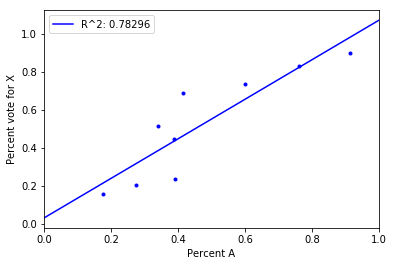

In [6]:
xp = np.linspace(0, 1, 100)
plt.xlabel("Percent A")
plt.ylabel("Percent vote for X")
plt.xlim(0,1)
plt.plot(perc_A, perc_vote_for_X, '.', color="b")
plt.plot(xp, l(xp), '-', color="b", label="R^2: {}".format(round(line.rvalue**2,5)))
plt.legend()
plt.show()

In [7]:
# noised_data = np.load("data/ToyDownNoised_budget_0.25_eps_[0.333333,0.333333,0.333333]_samps_1000.p")

In [8]:
# perc_A_noised = noised_data[:,:,1] / noised_data[:,:,0]

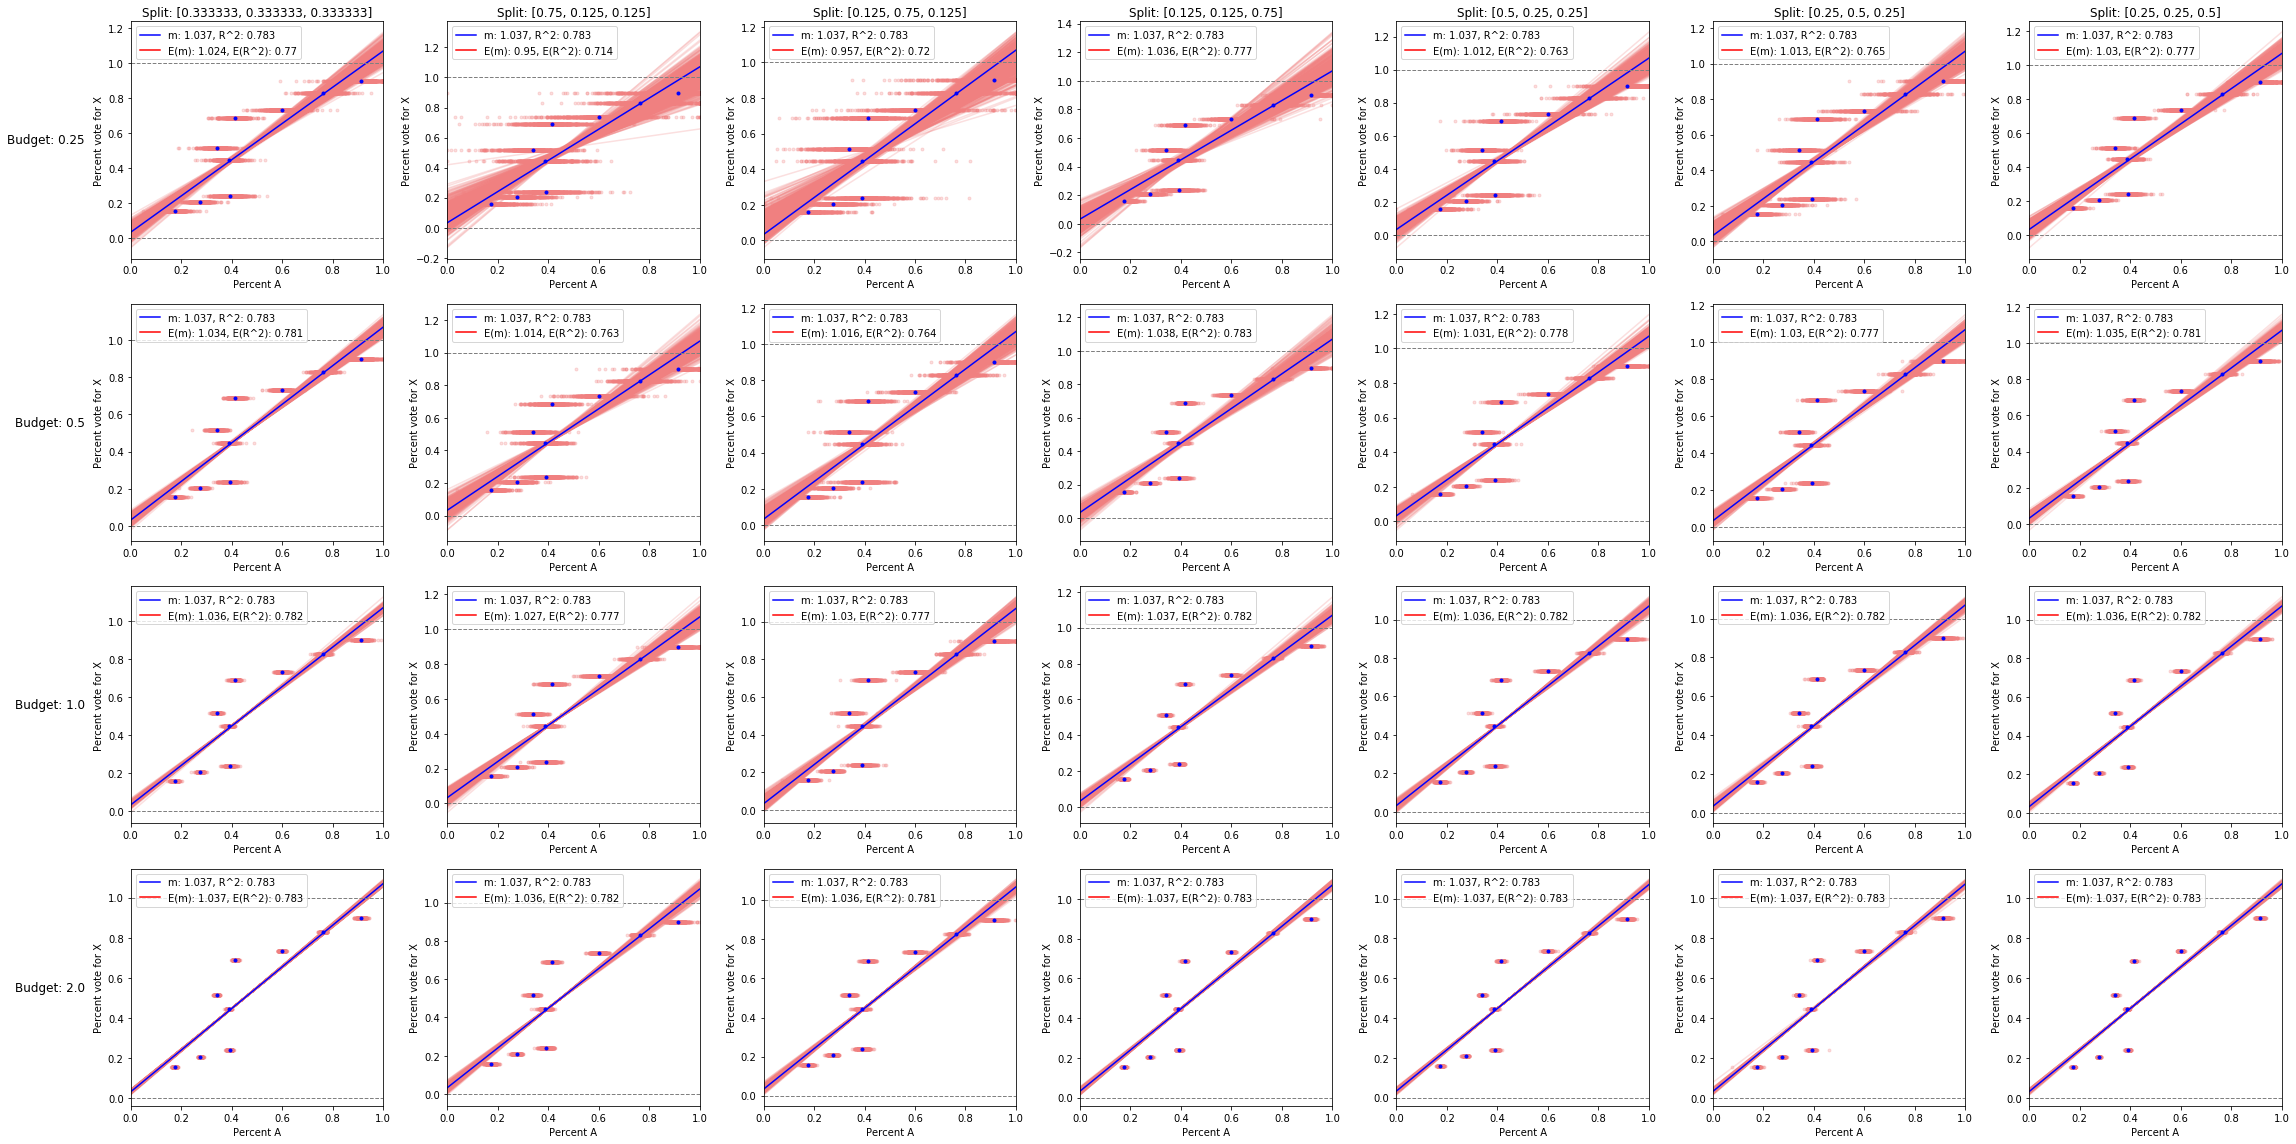

In [9]:
epsilons = [0.25, 0.5,1.0,2.0]
splits = [[0.333333,0.333333,0.333333], [0.75, 0.125, 0.125], [0.125, 0.75, 0.125], [0.125, 0.125, 0.75],
          [0.5, 0.25, 0.25], [0.25,0.5,0.25], [0.25,0.25, 0.5]]
n_samps = 1000
xp = np.linspace(0, 1, 100)
rs_noised = np.zeros((len(epsilons),len(splits),n_samps))
ms_noised = np.zeros((len(epsilons),len(splits),n_samps))

fig, axs = plt.subplots(nrows=len(epsilons),ncols=len(splits),figsize=(32, 16))

for i, eps in enumerate(epsilons):
    for j, split in enumerate(splits):
        noised_data = np.load("data/ToyDownNoised_budget_{}_eps_[{}]_samps_{}.p".format(eps, 
                                                                                        ",".join(str(n) for n in split), 
                                                                                n_samps))
        perc_A_noised = noised_data[:,:,1] / noised_data[:,:,0]
        
        for k in range(n_samps):
            line_noised = sp.stats.linregress(perc_A_noised[k], perc_vote_for_X)
            l_n = np.poly1d([line_noised.slope, line_noised.intercept])
            rs_noised[i,j,k] = line_noised.rvalue
            ms_noised[i,j,k] = line_noised.slope

            axs[i,j].plot(perc_A_noised[k], perc_vote_for_X, '.', color="lightcoral", alpha=0.25)
            axs[i,j].plot(xp, l_n(xp), '-', color="lightcoral", alpha=0.25)
        
        axs[i,j].plot(perc_A, perc_vote_for_X, '.', color="b")
        axs[i,j].plot(xp, l(xp), '-', color="b", label="m: {}, R^2: {}".format(round(line.slope, 3), round(line.rvalue**2,3)))
        axs[i,j].plot([], [], '-', color="r", label="E(m): {}, E(R^2): {}".format(round(np.mean(ms_noised[i,j]),3), 
                                                                                  round(np.mean(rs_noised[i,j]**2),3)))
        axs[i,j].legend()
        axs[i,j].set_xlabel("Percent A")
        axs[i,j].set_ylabel("Percent vote for X")
        axs[i,j].set_xlim(0,1)
        axs[i,j].axhline(0, ls="dashed", c="grey", linewidth=1)
        axs[i,j].axhline(1, ls="dashed", c="grey", linewidth=1)

pad = 5
for ax, col in zip(axs[0], ["Split: {}".format(s) for s in splits]):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axs[:,0], ["Budget: {}".format(e) for e in epsilons]):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
fig.tight_layout()
fig.savefig("plots/ToyDownMultAttribute_noise_on_er_all_splits.png", dpi=200)
fig.show()

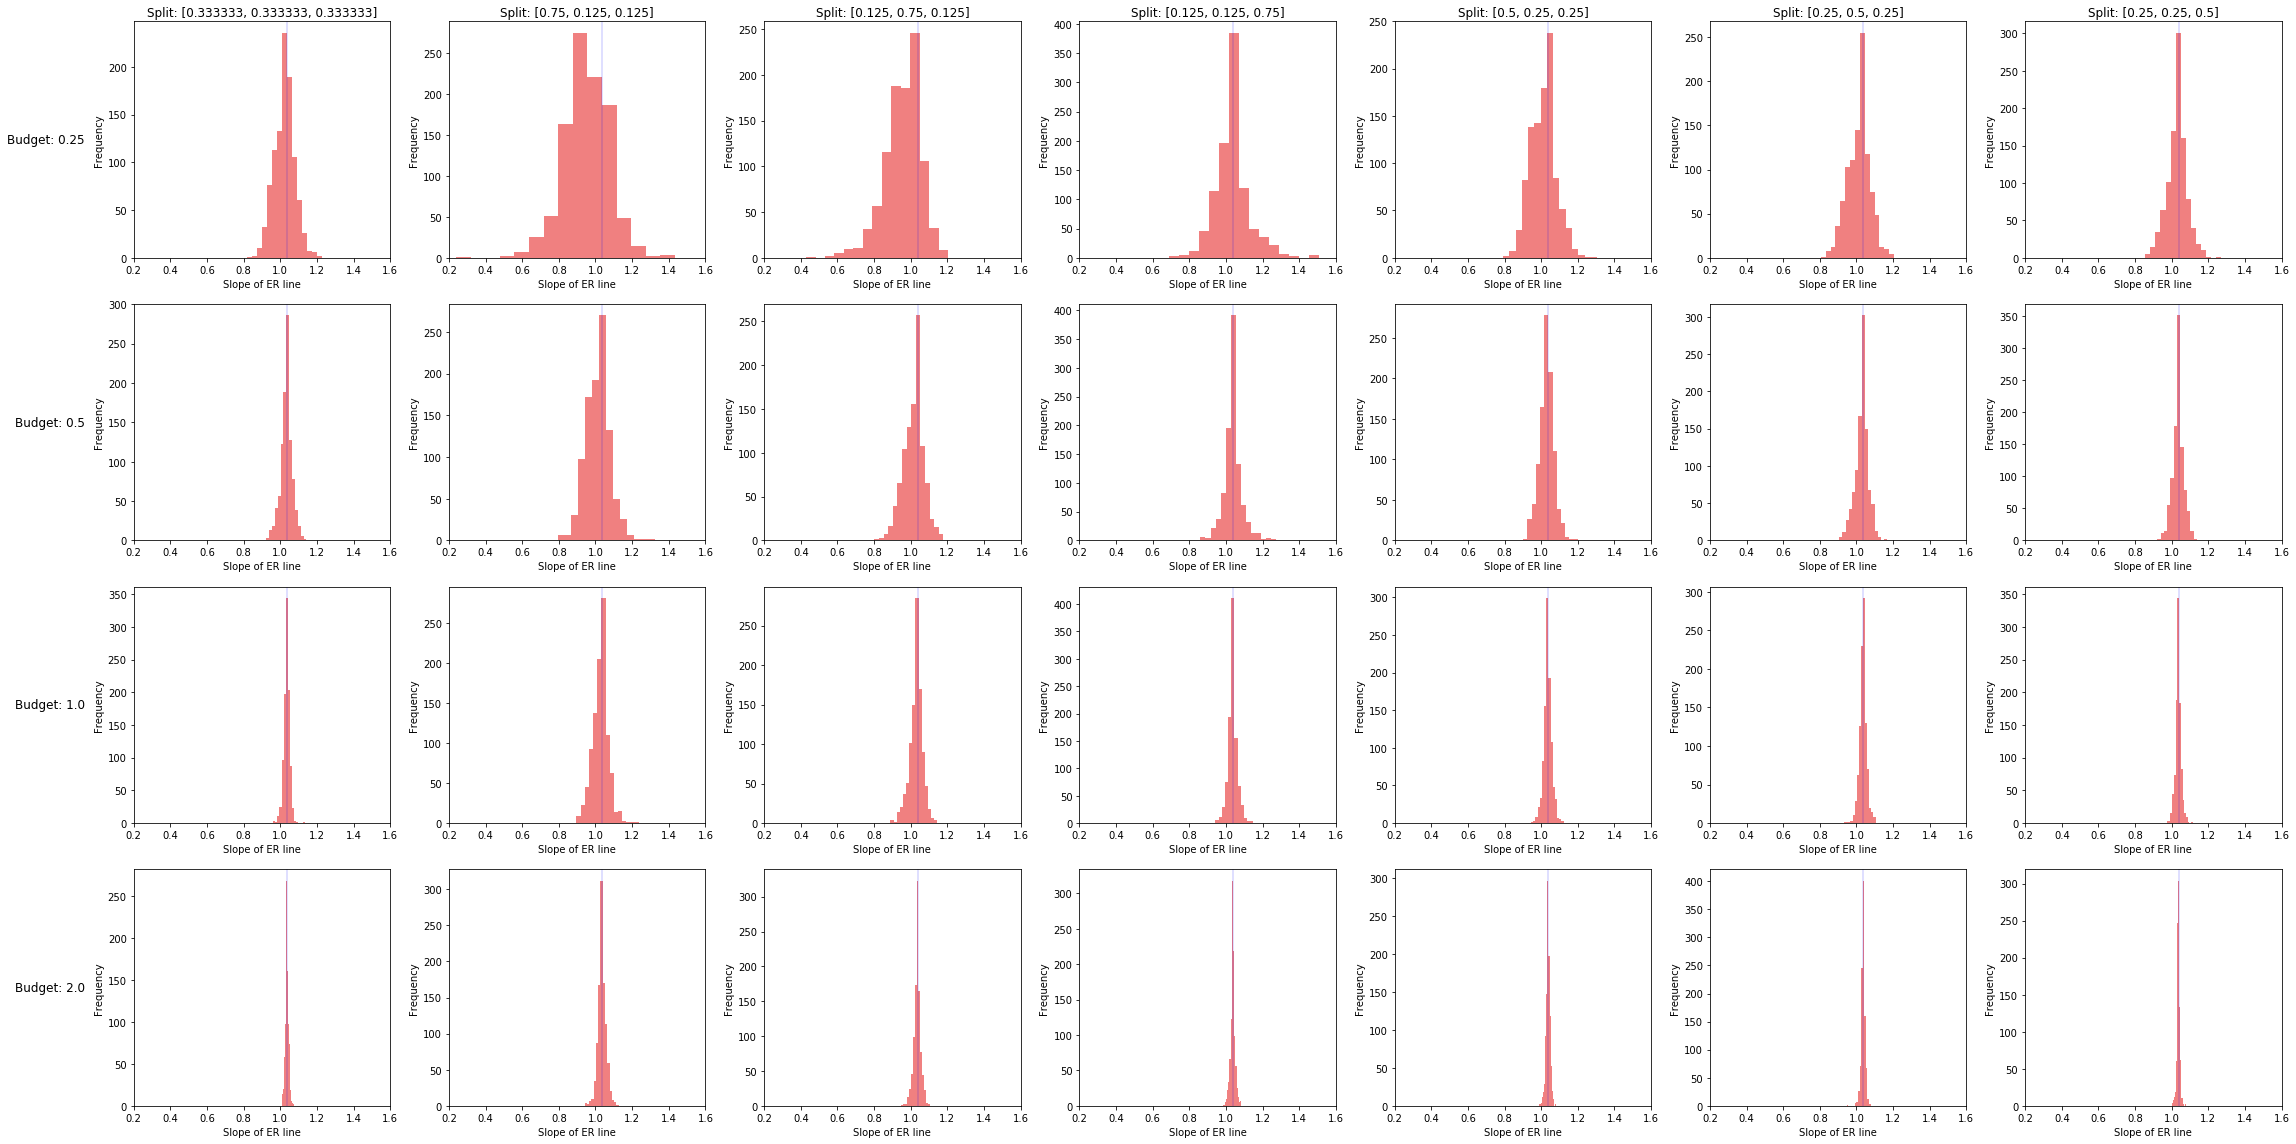

In [28]:
epsilons = [0.25, 0.5,1.0,2.0]
splits = [[0.333333,0.333333,0.333333], [0.75, 0.125, 0.125], [0.125, 0.75, 0.125], [0.125, 0.125, 0.75],
          [0.5, 0.25, 0.25], [0.25,0.5,0.25], [0.25,0.25, 0.5]]

fig, axs = plt.subplots(nrows=len(epsilons),ncols=len(splits),figsize=(32, 16))

for i, eps in enumerate(epsilons):
    for j, split in enumerate(splits):
        axs[i,j].hist(ms_noised[i,j], color="lightcoral", bins=15)#, alpha=0.5)
        axs[i,j].axvline(line.slope, color="b", linewidth=0.25)
#         axs[i,j].axvline(np.mean(ms_noised[i,j]), color="r", linewidth=1)
        
        axs[i,j].set_xlabel("Slope of ER line")
        axs[i,j].set_ylabel("Frequency")
        axs[i,j].set_xlim(0.2, 1.6)
#         axs[i,j].set_ylim(0, 500)

pad = 5
for ax, col in zip(axs[0], ["Split: {}".format(s) for s in splits]):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axs[:,0], ["Budget: {}".format(e) for e in epsilons]):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
fig.tight_layout()
fig.savefig("plots/ToyDownMultAttribute_noise_on_er_slope_hists_all_splits.png", dpi=200)
fig.show()

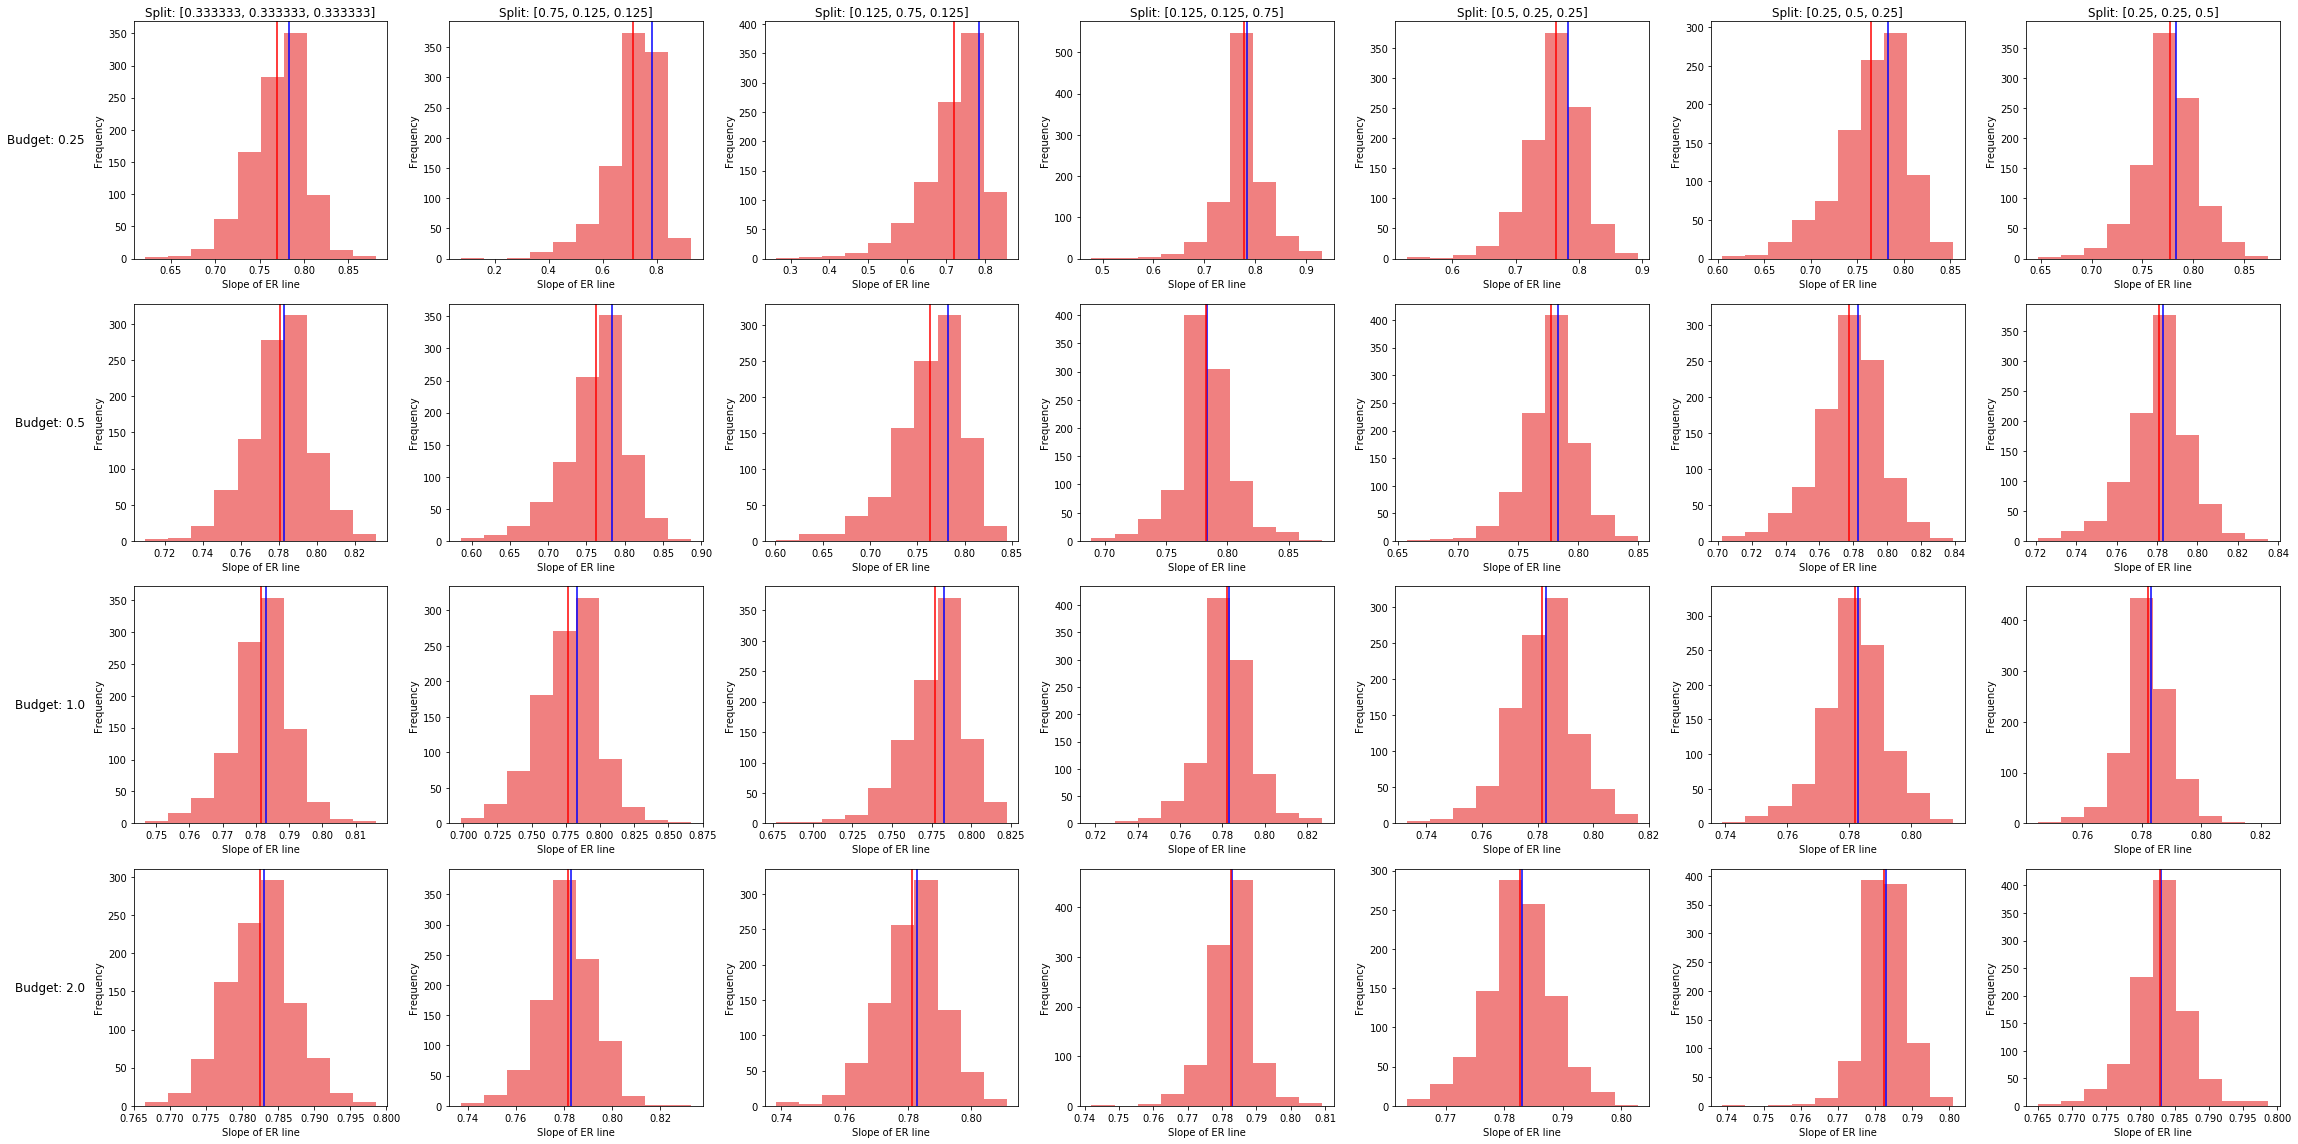

In [18]:
epsilons = [0.25, 0.5,1.0,2.0]
splits = [[0.333333,0.333333,0.333333], [0.75, 0.125, 0.125], [0.125, 0.75, 0.125], [0.125, 0.125, 0.75],
          [0.5, 0.25, 0.25], [0.25,0.5,0.25], [0.25,0.25, 0.5]]

fig, axs = plt.subplots(nrows=len(epsilons),ncols=len(splits),figsize=(32, 16))

for i, eps in enumerate(epsilons):
    for j, split in enumerate(splits):
        axs[i,j].hist(rs_noised[i,j]**2, color="lightcoral")#, alpha=0.5)
        axs[i,j].axvline(line.rvalue**2, color="b")
        axs[i,j].axvline(np.mean(rs_noised[i,j]**2), color="r")
        
        axs[i,j].set_xlabel("Slope of ER line")
        axs[i,j].set_ylabel("Frequency")

pad = 5
for ax, col in zip(axs[0], ["Split: {}".format(s) for s in splits]):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axs[:,0], ["Budget: {}".format(e) for e in epsilons]):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
fig.tight_layout()
fig.show()